In [21]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df1 = pd.read_csv("data/ADANIPORTS.csv", index_col="Date", parse_dates=True)
# univatiate
df1 = df1[['Close']]

In [7]:
from pmdarima import auto_arima

In [8]:
stepwise_fit = auto_arima(df1['Close'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10150.917, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10151.599, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10151.505, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10149.782, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10150.846, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.580 seconds


In [9]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5073.891
Date:                Sun, 26 Nov 2023   AIC                          10149.782
Time:                        17:04:45   BIC                          10154.901
Sample:                             0   HQIC                         10151.707
                               - 1236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       216.7960      3.519     61.603      0.000     209.898     223.694
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):              5711.90
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               4.72   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [11]:
df3 = df1[:120]

<Axes: xlabel='Date'>

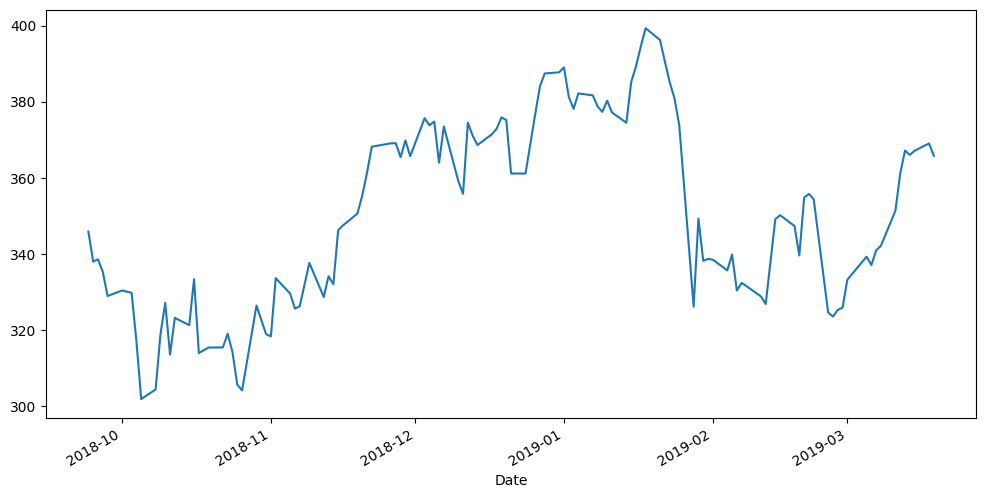

In [12]:
df3['Close'].plot(figsize=(12,6))

In [13]:
auto_arima(df3['Close'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -433.023
Date:                Sun, 26 Nov 2023   AIC                            868.045
Time:                        17:05:22   BIC                            870.824
Sample:                             0   HQIC                           869.174
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        84.7592      5.509     15.387      0.000      73.963      95.556
===================================================================================
Ljung-Box (L1) (Q):                   2.65   Jarque-Bera (JB):               203.62
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                            -1.07
Prob(H) (two-sided):                  0.09   Kurtosis:                         9.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
train = df3.iloc[:90]
test = df3.iloc[90:]

In [22]:
model = SARIMAX(train['Close'], order=(0,1,0)).fit()